# Read file

In [4]:
!curl https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt -o test.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1089k  100 1089k    0     0  1637k      0 --:--:-- --:--:-- --:--:-- 1635k


# Read data from text file

In [1]:
with open("test.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [2]:
print(f"Length of the text: {len(text)}")

Length of the text: 1115394


In [3]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [4]:
# here are all the unique character in the text data
char = sorted(list(set(text)))
vocab_size = len(char)
print(f"Unique characters: {vocab_size}")
print("".join(char))

Unique characters: 65

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


# Sample Tokenizer works

In [5]:
# create a mapping from characters to integers
# creating the dict and mappping the characters to numbers
ench = {ch: i for i, ch in enumerate(char)}
print(f"Type of ench is: {type(ench)} and value of ench is: {ench}")
# Mapping the numbers to characters
dech = {i: ch for i, ch in enumerate(char)}
print(f"Type of dech is: {type(dech)} and value of dech is: {dech}")


# this will convert the characters to numbers and return character token list
def encode(s): return [ench[c] for c in s]
# this will decode the numbers to characters
def decode(s): return ''.join([dech[i] for i in s])

Type of ench is: <class 'dict'> and value of ench is: {'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}
Type of dech is: <class 'dict'> and value of dech is: {0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W',

In [6]:
# example how small encoder and decoder works !
print(f"Encoded data: {encode('My name is Ayush')}")
print(f"Decoded data: {decode(encode('My name is Ayush'))}")

Encoded data: [25, 63, 1, 52, 39, 51, 43, 1, 47, 57, 1, 13, 63, 59, 57, 46]
Decoded data: My name is Ayush


In [7]:
import torch

In [8]:
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [9]:
# split into train, test and validate
n = int(0.9 * len(data))  # 90% is train data and rest is test data
train_data = data[:n]
test_data = data[n:]

In [10]:
block_size = 8

In [11]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

for t in range(block_size):
    context = x[:t + 1]
    target = y[t]
    print(f"when input is {context} the target is: {target}")

when input is tensor([18]) the target is: 47
when input is tensor([18, 47]) the target is: 56
when input is tensor([18, 47, 56]) the target is: 57
when input is tensor([18, 47, 56, 57]) the target is: 58
when input is tensor([18, 47, 56, 57, 58]) the target is: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target is: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target is: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target is: 58


In [22]:
x[:4+1]

tensor([18, 47, 56, 57, 58])

In [23]:
y[4]

tensor(1)

In [3]:
import os
import requests
from pytube import Playlist, Search, YouTube
from youtube_transcript_api import YouTubeTranscriptApi

In [13]:
def get_transcript(video_id: str) -> str:
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        return " ".join([script['text']for script in transcript])
    except Exception as e:
        print(e)
        pass


def download_video_series(video_metadata: list):
    '''Iterate through all links in video_metadata 
       and download them one by one'''
    try:
        for data in video_metadata:
            # file_name = data['title'] + data['video_id'] + ".mp4"
            file_name = f"{data['title']}_{data['video_id']}.mp4"

            if os.path.exists(file_name):
                print(
                    f"Skipping download for {file_name}. File already exists.")
                continue

            print(f"Downloading file: {file_name}")

            # create response object
            # Assuming you want the first URL in the list
            r = requests.get(data['url'][0], stream=True)

            # check if the request was successful (status code 200)
            r.raise_for_status()

            # download started
            with open(file_name, 'wb') as f:
                for chunk in r.iter_content(chunk_size=1024*1024):
                    if chunk:
                        f.write(chunk)

            print(f"{file_name} downloaded!\n")

    except requests.exceptions.RequestException as req_ex:
        print(f"Error in requests: {req_ex}")
    except Exception as e:
        print(f"Error: {e}")


def get_video_metadata(search_data: object = None, playlist_data: object = None) -> list:
    metadata = []
    try:
        data_source = search_data if search_data else playlist_data

        for index, result in enumerate(data_source.results if search_data else data_source.videos):
            print(
                f"Extracting Metadata for video {index + 1} of {len(data_source.results if search_data else data_source.videos)}")
            video_metadata = {
                'title': result.title,
                'video_id': result.video_id,
                'url': [_['url'] for _ in result.streaming_data['formats'] if _['qualityLabel'] == "360p"],
                'transcript': get_transcript(result.video_id)
            }
            metadata.append(video_metadata)

        return metadata
    except Exception as e:
        print(f"Error: {e}")
        return []

In [5]:
ytdata = YouTube("https://youtu.be/Ha94lrFUIUU?si=VAk2S9xBj9omqmLM")

In [10]:
ytdata.video_id

'Ha94lrFUIUU'

In [14]:
# for i in ytdata.streaming_data['formats']:
#     if i['qualityLabel'] == "360p":
#         print(i)
        # download_video_series(list(i['url']))
        # r = requests.get(i['url'], stream=True)
        # print(r.status_code)
        # # check if the request was successful (status code 200)
        # r.raise_for_status()

        # # download started
        # with open("file_name.mp4", 'wb') as f:
        #     for chunk in r.iter_content(chunk_size=1024*1024):
        #         if chunk:
        #             f.write(chunk)
get_transcript(ytdata.video_id)

"- How can we better define\nroles and responsibilities for UX. and product managers? A great tool to solve\nthis common challenge is a RACI matrix, also known as a responsibility\nassignment matrix. The framework helps individuals\nacross different roles, areas of expertise, and specialization, outline their participation and decision making in\nproduct development. In the RACI, list product\ndevelopment phases and tasks in the first column,\ngiving each its own row. Represent people and roles\nin columns across the top, looking down and across the RACI where roles intersect with\nproduct development work, specify how they will participate by marking the cell with\nan R, an A, a C, or an I. An R represents the people responsible for doing the work outlined in the row. You can assign responsibility to more than one person in the RACI. A stands for accountable or the person who\nprovides the final review and ultimately determines\nthe work is complete. For each row there should only eve

In [ ]:
"- How can we better define\nroles and responsibilities for UX. and product managers? A great tool to solve\nthis common challenge is a RACI matrix, also known as a responsibility\nassignment matrix. The framework helps individuals\nacross different roles, areas of expertise, and specialization, outline their participation and decision making in\nproduct development. In the RACI, list product\ndevelopment phases and tasks in the first column,\ngiving each its own row. Represent people and roles\nin columns across the top, looking down and across the RACI where roles intersect with\nproduct development work, specify how they will participate by marking the cell with\nan R, an A, a C, or an I. An R represents the people responsible for doing the work outlined in the row. You can assign responsibility to more than one person in the RACI. A stands for accountable or the person who\nprovides the final review and ultimately determines\nthe work is complete. For each row there should only ever be one accountable person, though they can also be\nresponsible for the work. C stands for consulted. These are the people who provide input and expertise as the work is getting done. This could be a UX manager\nor a subject matter expert. Finally, I stands for informed. These roles are kept aware\nof progress along the way, but they're not involved in each and every detail or decision. For example, this might\nbe high level leadership outside of the product team. Roles marked responsible and accountable need to work together to get\nthe tasks or deliverables done. The accountable person\nbrings in the consulted and informed roles and needed. Over time, your team should\nbecome less reliant on the RACI to outline roles and responsibilities. The longer you work together, the more obvious role participation\nand involvement becomes. Try using a RACI to point your product team\nin the right direction to improve partnerships\nand your product outcomes. - Thanks for watching. If you wanna see more of our UX videos, take a look at these over here and consider subscribing to our channel. On our website, nngroup.com, you can access our free\nlibrary of over 2,000 articles. You can also register\nfor one of our UX courses that offer live hands-on UX training."

In [1]:
from openai import OpenAI

# client = OpenAI(api_key="", max_retries=3)

In [16]:
from PIL import Image

image = Image.open("/Users/ayushpujari/Desktop/Screenshot 2024-02-25 at 10.25.37 PM.png")

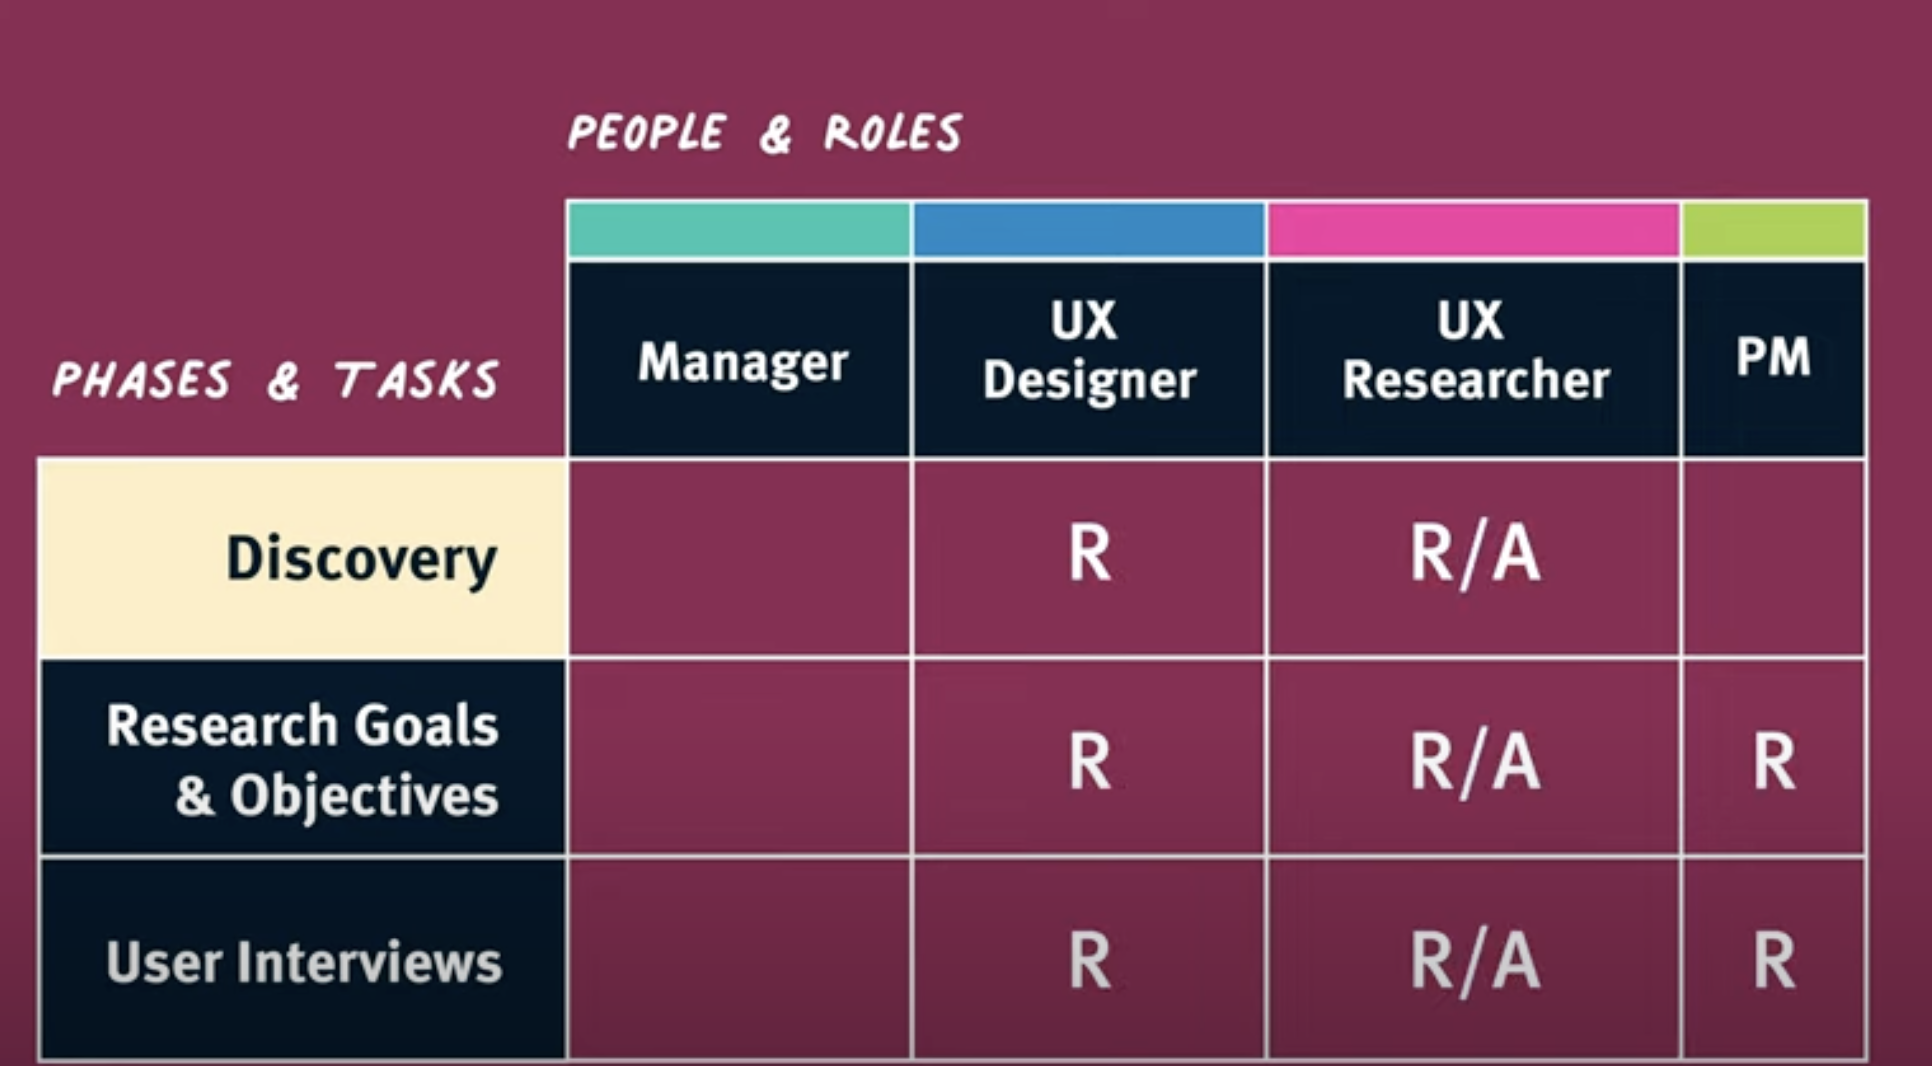

In [17]:
image

In [4]:
import google.generativeai as genai
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

genai.configure(api_key=os.environ.get("GOOGLEAI_API_KEY"))
client = genai.GenerativeModel("gemini-pro-vision")

In [38]:
data = client.generate_content([f"you are an UX designer. your work is to interpret the link provided to you and provide a summary of the image based ont the given context: {context}", image])

In [41]:
# import pprint
# pprint.pprint(data.text)

# Data preparation

In [1]:
import re
import json
import string
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from googleapiclient.discovery import build

In [2]:
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [3]:
def text_processing(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text



In [1]:
import os
import json
import pymongo

from datetime import datetime
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

db = MongoClient(os.environ.get("MONGO_URI"))["youtube_data"]

def insert_images_to_mongo():
    collection = db["images"]
    collection.create_index([("video_id", pymongo.DESCENDING)])

    image_dir_path = "./Image_dir"
    if os.path.exists(image_dir_path) and os.listdir(image_dir_path):
        for folder_name in os.listdir(image_dir_path):
            folder_path = os.path.join(image_dir_path, folder_name)
            print(folder_path)
            if os.path.isdir(folder_path) and os.listdir(folder_path):
                for image_name in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_name)
                    with open(image_path, "rb") as image_file:
                        collection.insert_one({
                            "video_id": folder_name.split("_")[-1],
                            "created_at": datetime.now(),
                            "image_id": open(image_path, "rb").read()
                        })
def create_metadata():
    collection = db["metadata"]
    collection.create_index([("video_id", pymongo.DESCENDING)])

    if os.path.exists("metadata"):
        for file in os.listdir("metadata"):
            with open(f"metadata/{file}", "r") as f:
                data = json.load(f)
                for _ in data:
                    _['created_at'] = datetime.now()
                    collection.insert_one(_)